In [1]:
import sys
import csv
import numpy as np
import random
import matplotlib.pyplot as plt

We will now define some useful functions for the main section of the notebook.

In [2]:
#Swapping two parts of a list
def swapper(alist, a, b):
	saver = alist[a]
	alist[a] = alist[b]
	alist[b] = saver
	return None

#Quicksort
def quicksort(alist):
	#Base cases
	if len(alist) <= 1:
		return alist
	#Pick item to split on, randomly
	b = random.randint(1, len(alist) - 1)
	splitter = alist[b]
	a = 0
	swapper(alist, b, len(alist) - 1)
	#Shuffle through, sorting
	for i in range(0, len(alist)):
		if alist[i] <= splitter:
			swapper(alist, a, i)
			a += 1
	#recur
	return quicksort(alist[0:a-1]) + [splitter] + quicksort(alist[a:len(alist)])

#Checks if the element is in the array
def isItMissing(element, array):
	for i in range(0, len(array)):
		if array[i] == element:
			return False
	return True

#Finds the index of the element in the list of lists
def getIndex(element, array):
	for i in range(0, len(array)):
		if array[i][0] == element:
			return i
	return -1

In [3]:
# read in system arguments, first the csv file, max degree fit, number of folds, verbose
rfile = 'checkin_dataset.csv'

csvfile = open(rfile, 'rt')
dat = csv.reader(csvfile, delimiter=',')
X = []
Y = []
timestamp = []
users = []
# put the x coordinates in the list X, the y coordinates in the list Y, etc.
next(dat)
for row in dat:
    X.append(float(row[3]))
    Y.append(float(row[4]))
    timestamp.append(row[2])
    users.append(int(row[1]))

To get a basic idea of what the data looks like, we will plot X versus Y.

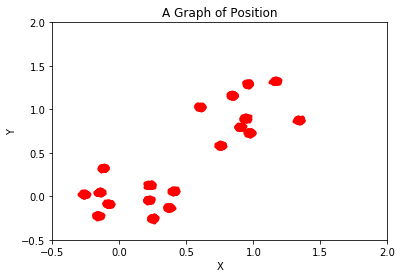

In [4]:
plt.plot(X, Y, "r.")
axes = plt.gca()
axes.set_xlim([-0.5, 2])
axes.set_ylim([-0.5, 2])
plt.ylabel("Y")
plt.xlabel("X")
titlestring = "A Graph of Position"
plt.title(titlestring)
plt.show()

As is plain to see, the data is heavily clustered. Our goal is to try to find useful data for osXtern from this information, so although the data seems fairly linear, a regression would not make much sense. There would not be any benefit to it, since we won't ever have to predict their y-coordinate from their x-coordinate. If they are checking in with their location data, we'll receive both.

Instead, we will try to isolate some sort of common element to the clusters. First, we will try to examine each user individually.

In [5]:
#Grab the distinct users.
distinctUsers = []
for i in range(0, len(users)):
	if isItMissing(users[i], distinctUsers):
		distinctUsers.append(users[i])
		
distinctUsers = quicksort(distinctUsers)

In [6]:
indexeddata = []

for i in range(0, 100):
    indexeddata.append([[],[]])

for i in range(0, len(users)):
    indexeddata[users[i]][0].append(X[i])
    indexeddata[users[i]][1].append(Y[i])

The above has sorted our position data into a more useful form. We can now easily display the information for any given user. Below displays the position data for all the users.

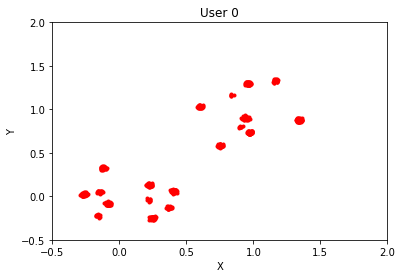

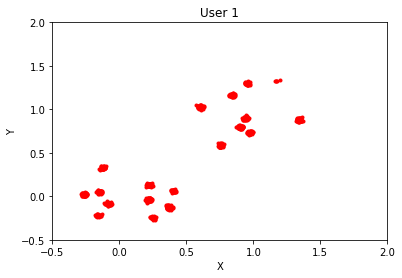

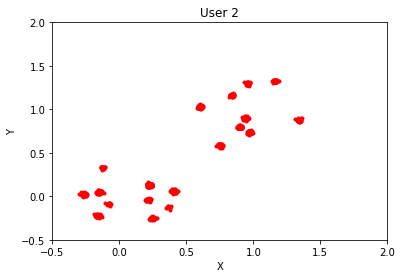

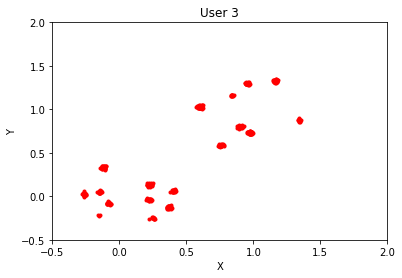

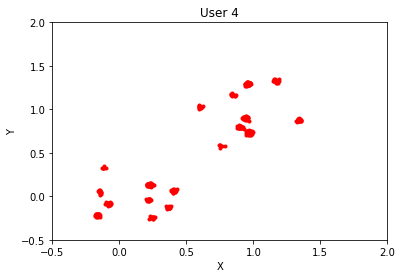

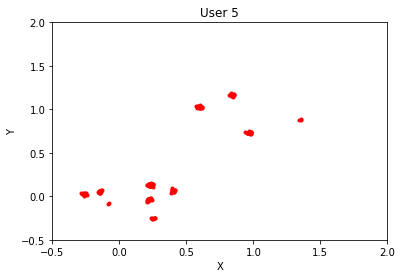

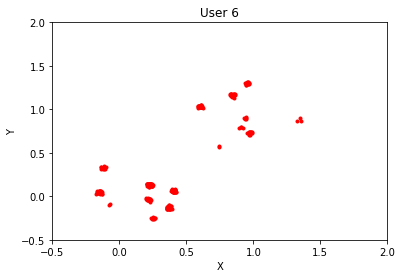

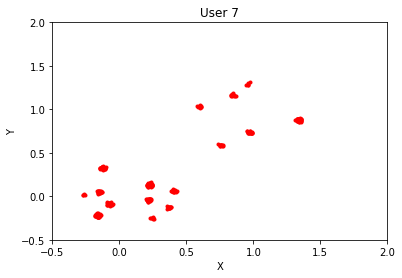

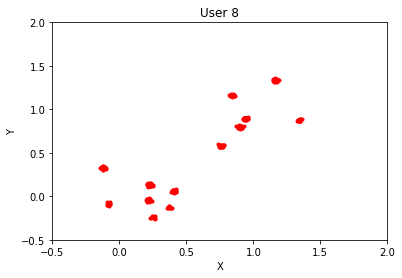

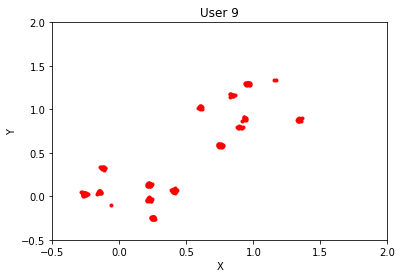

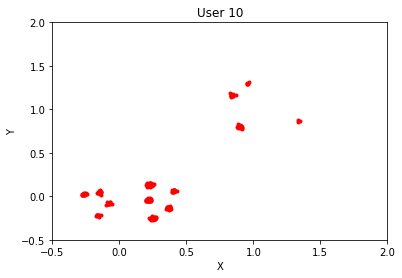

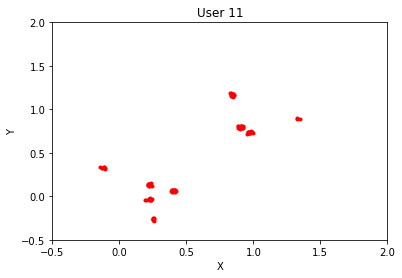

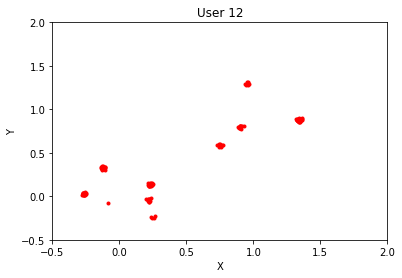

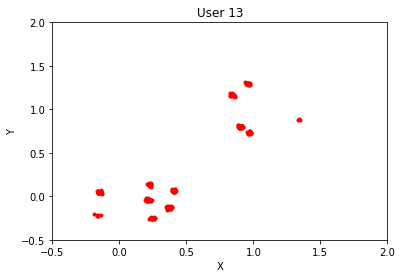

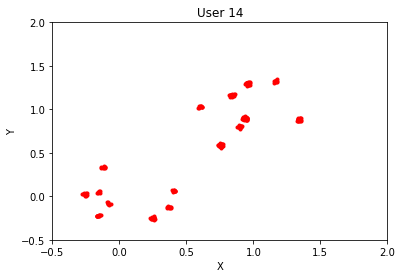

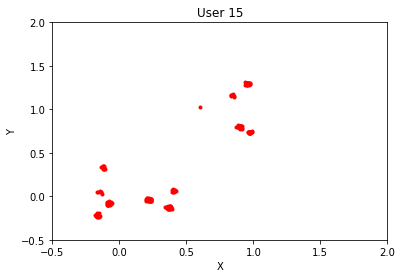

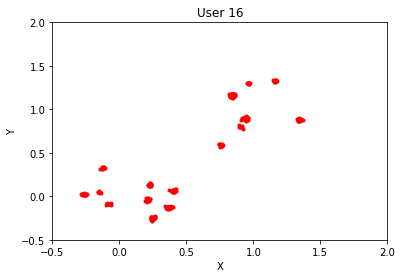

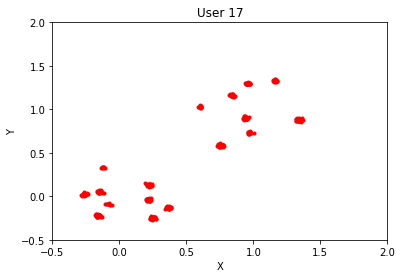

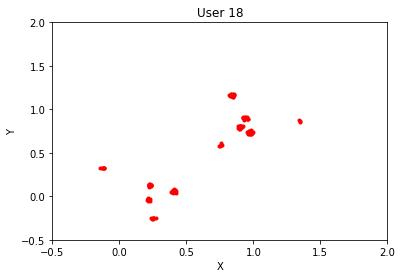

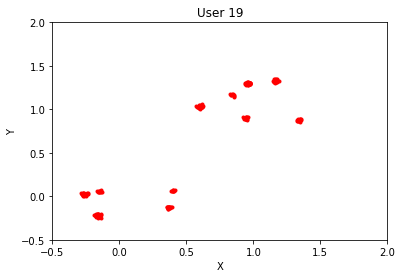

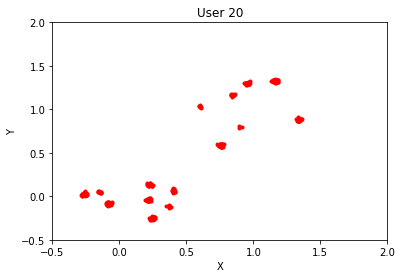

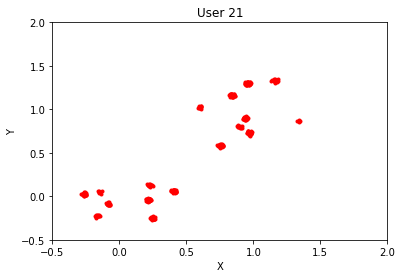

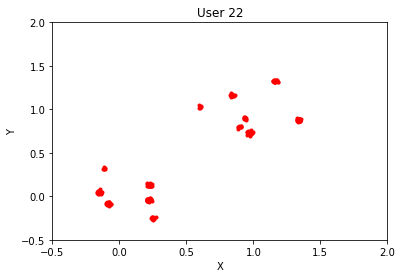

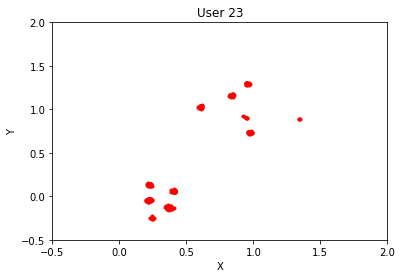

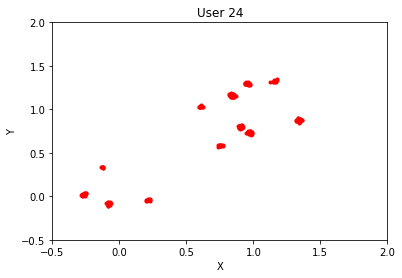

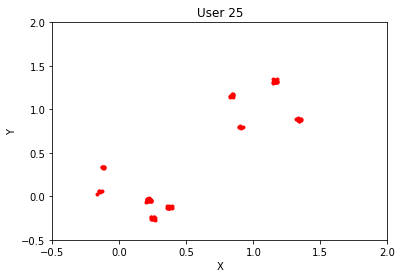

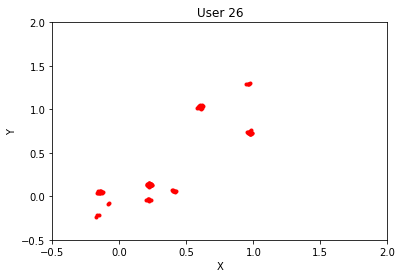

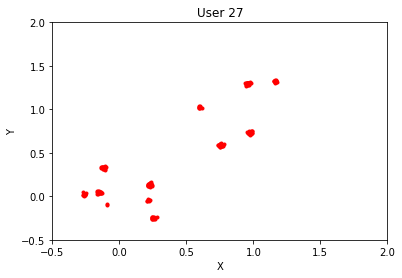

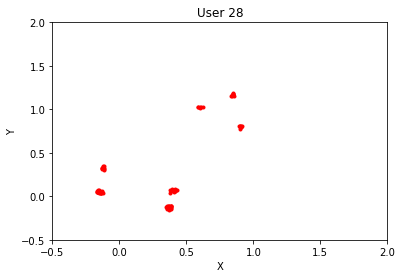

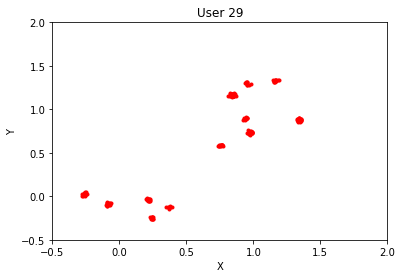

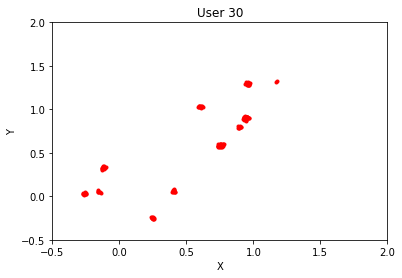

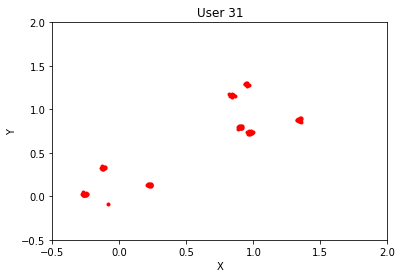

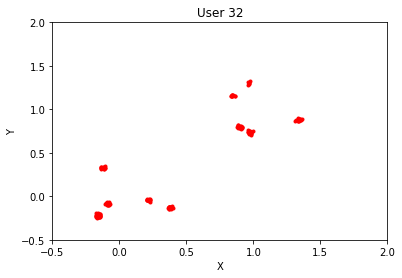

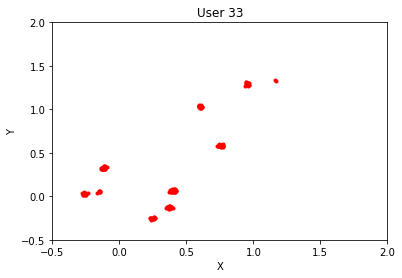

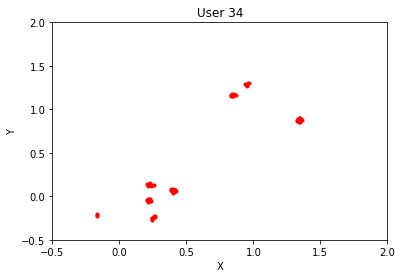

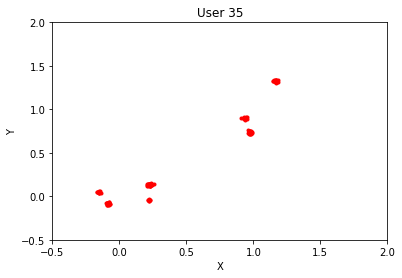

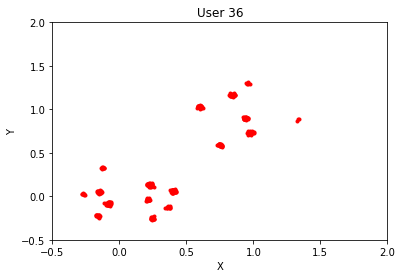

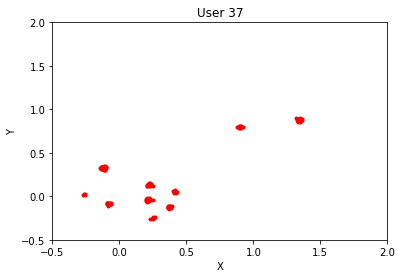

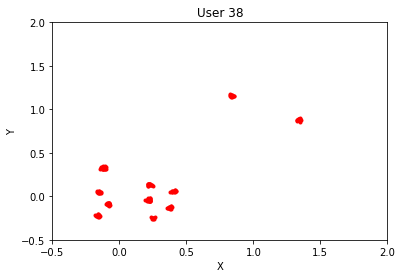

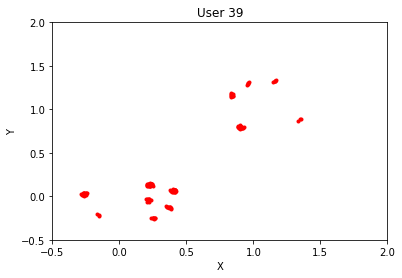

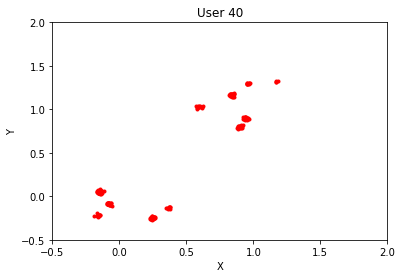

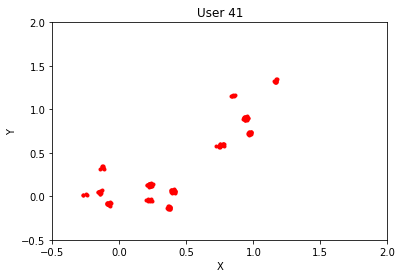

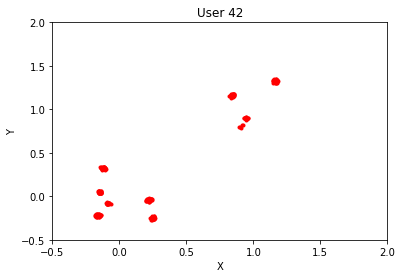

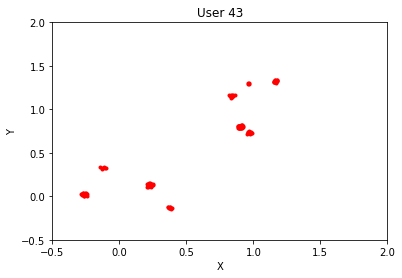

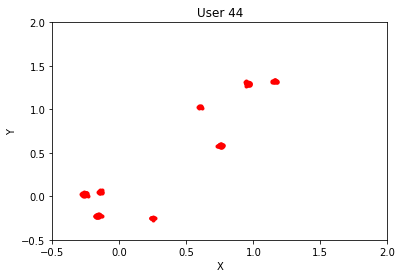

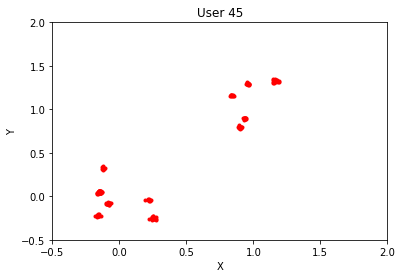

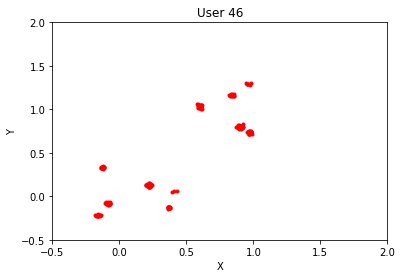

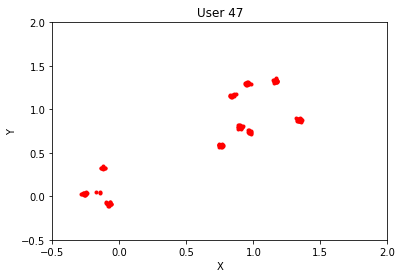

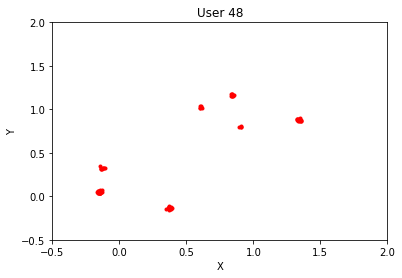

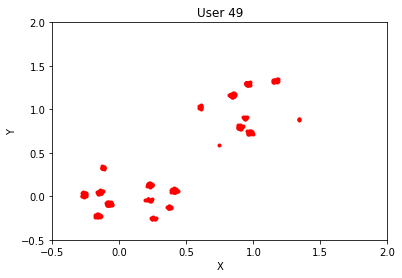

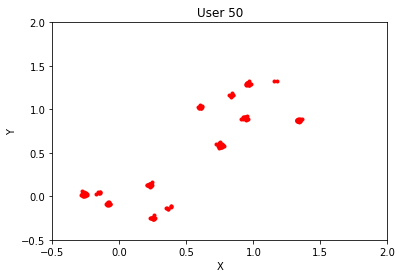

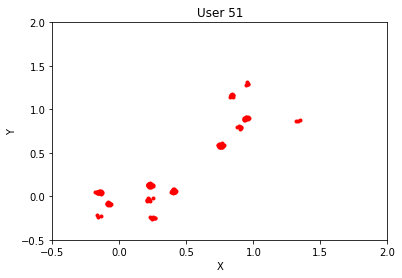

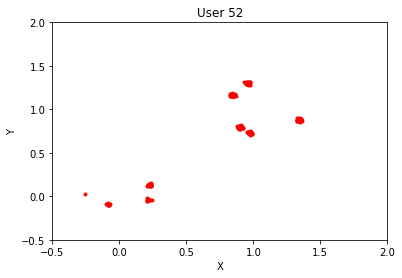

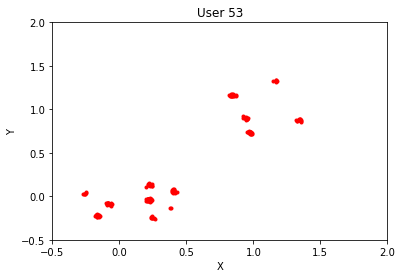

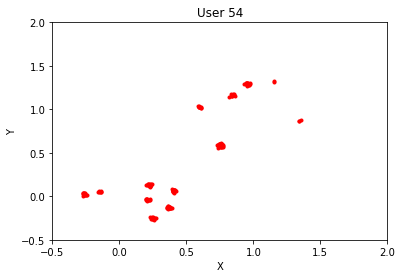

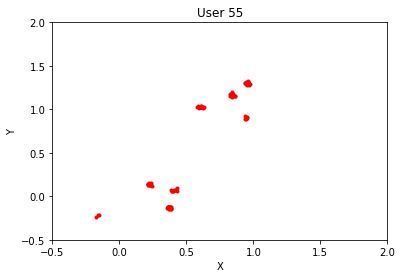

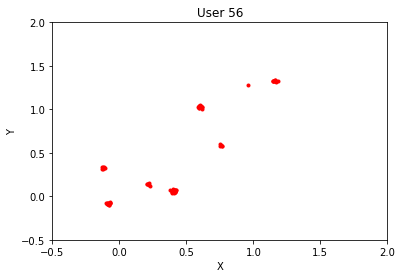

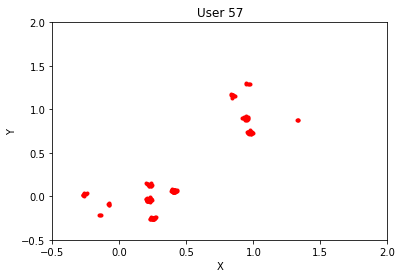

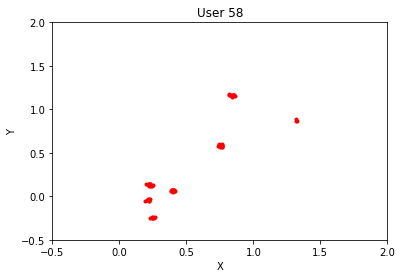

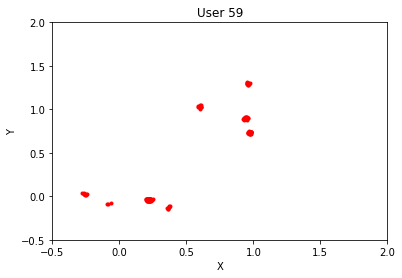

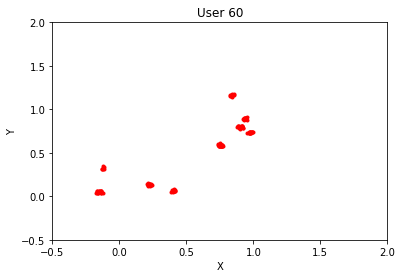

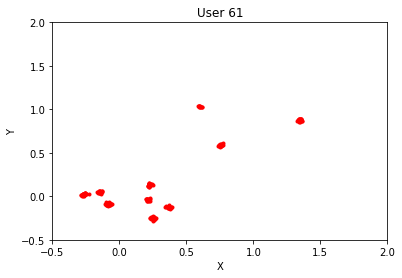

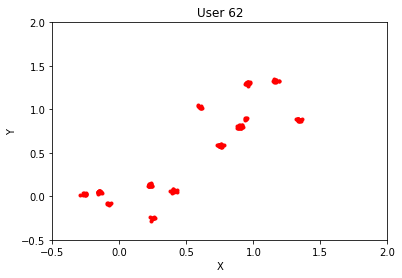

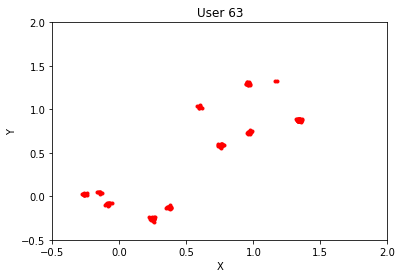

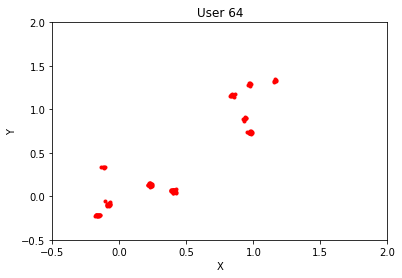

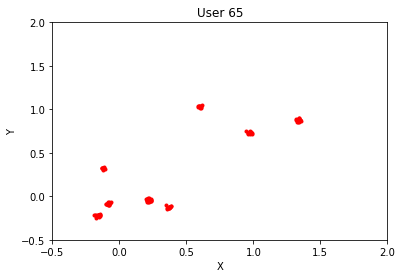

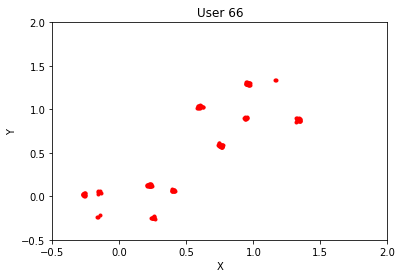

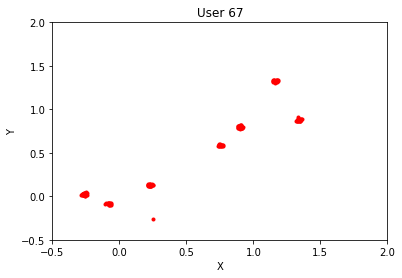

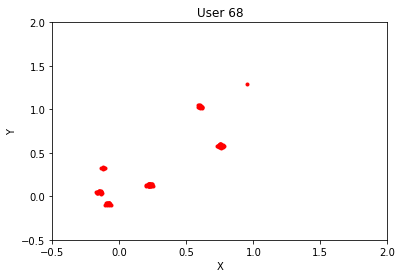

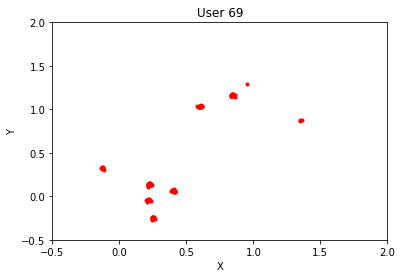

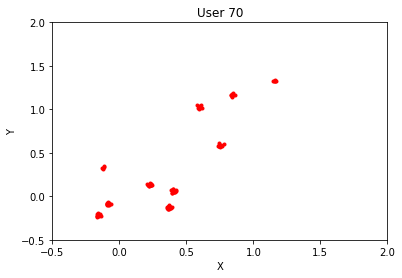

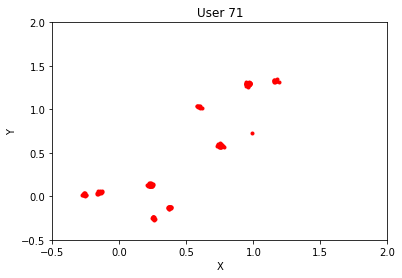

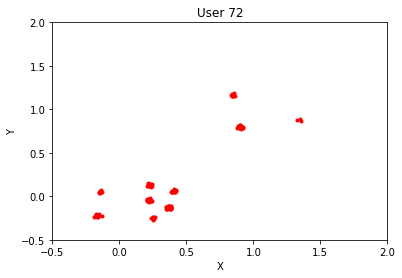

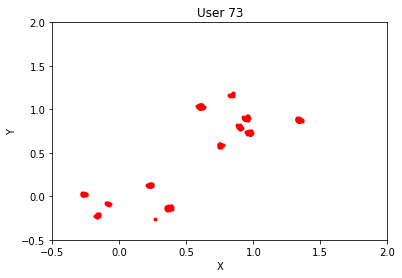

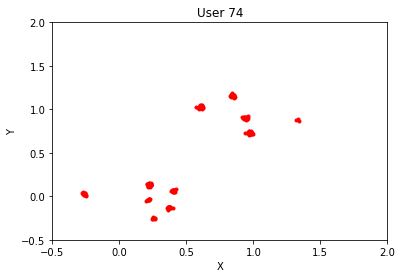

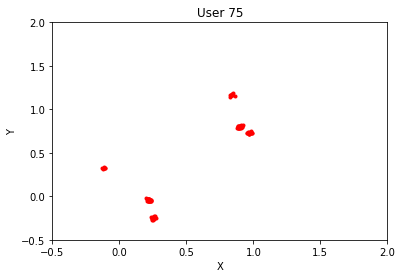

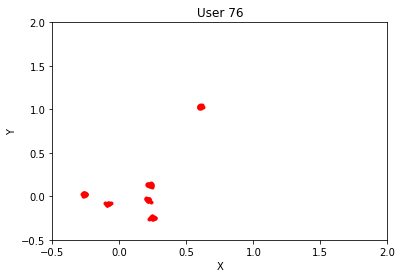

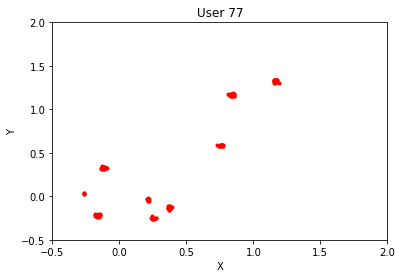

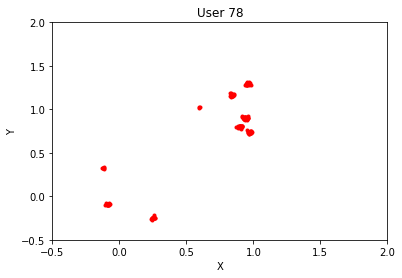

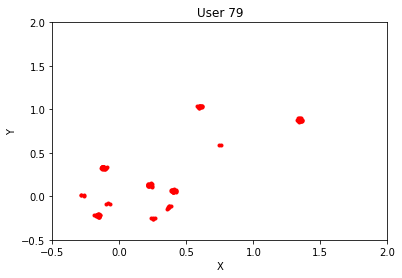

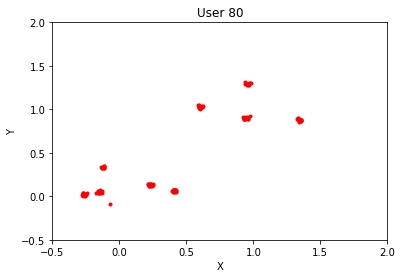

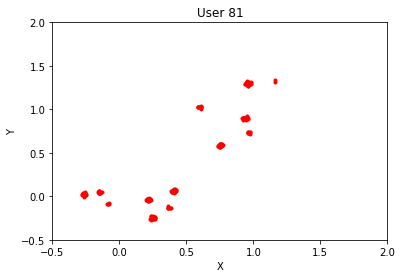

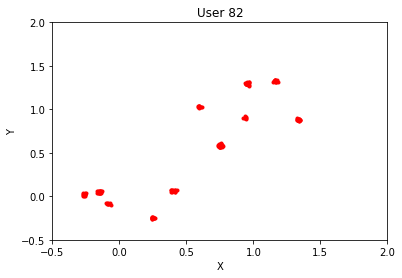

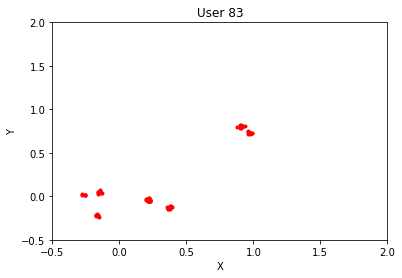

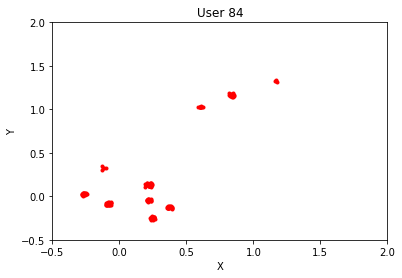

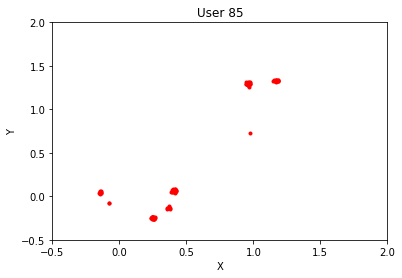

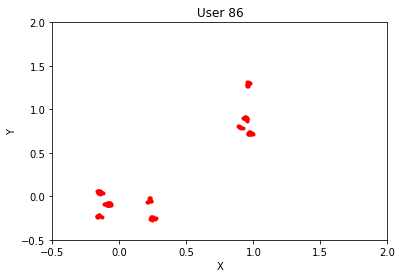

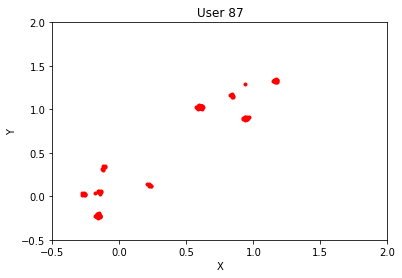

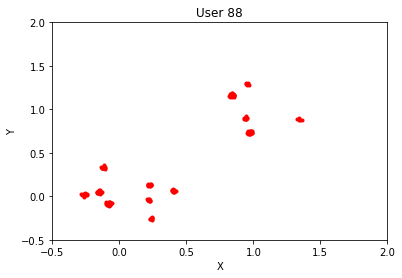

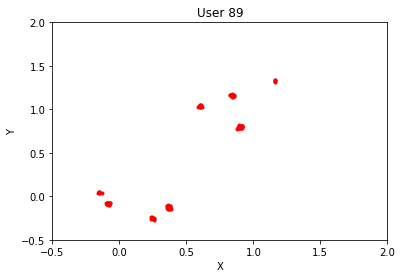

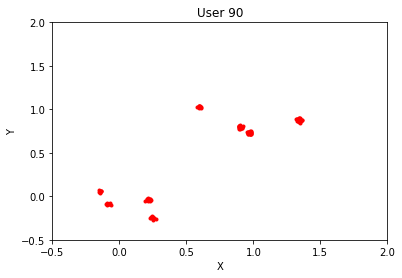

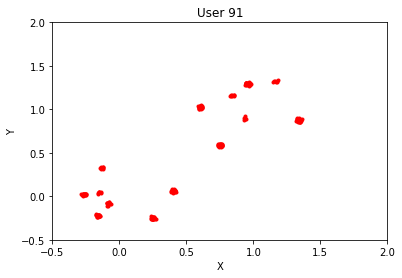

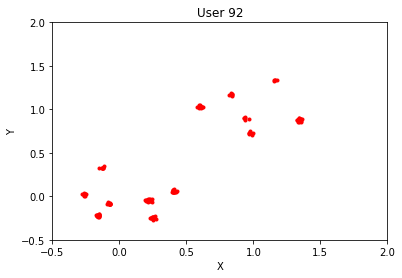

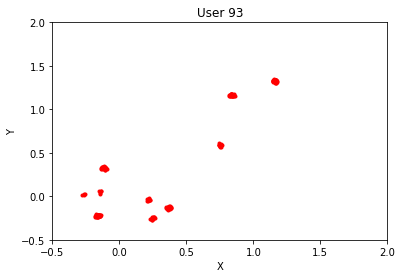

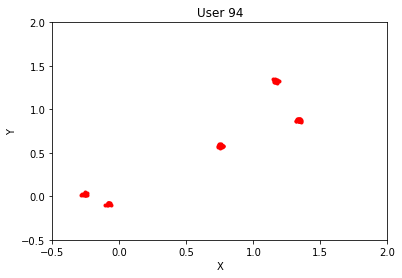

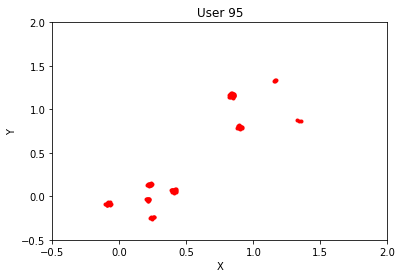

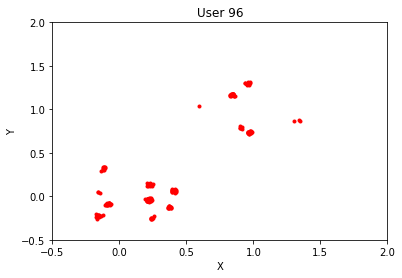

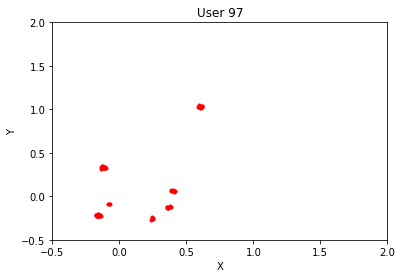

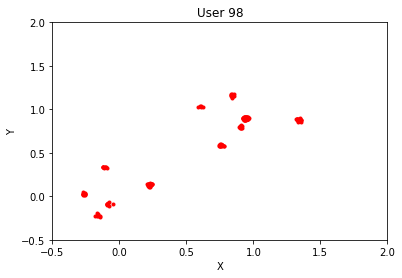

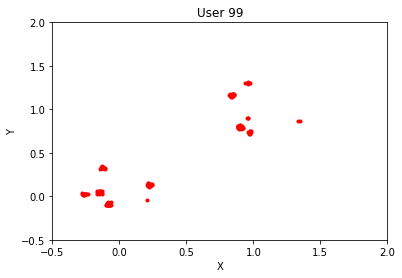

In [7]:
def displayUser(i):
    Xi = np.array(indexeddata[i][0])
    Yi = np.array(indexeddata[i][1])
    plt.plot(Xi, Yi, "r.")
    axes = plt.gca()
    axes.set_xlim([-0.5, 2])
    axes.set_ylim([-0.5, 2])
    plt.ylabel("Y")
    plt.xlabel("X")
    titlestring = "User " + str(i)
    plt.title(titlestring)
    plt.show()
    
for i in range(0,100):
    displayUser(i)

This is useful in that we can take any given user and ascertain the locations they frequent. For instance, these users doesn't visit all of the same places. Different users visit different locations with different frequencies, and, if these locations correspond to real places, this could be used to analyze how users spend their time, and thus guess at their interests.

We will now attempt to analyze the location data on each day.

In [8]:
#Grab the days. Index by date.
days = []
for i in range(0, len(timestamp)):
	for j in range(0, len(timestamp[i])):
		if timestamp[i][j] == " ":
			breaker = j
			break
	days.append(timestamp[i][0:breaker])

uniquedays = []
for i in range(0, len(days)):
	index = getIndex(days[i], uniquedays)
	if index == -1:
		uniquedays.append([days[i], [], []])
	uniquedays[index][1].append(X[i])
	uniquedays[index][2].append(Y[i])

The above has sorted our data into a more useful form. We now display every date.

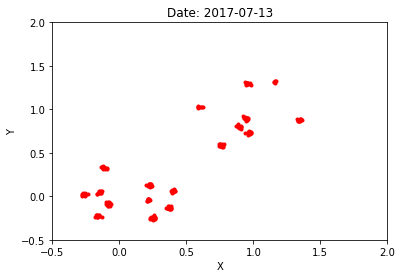

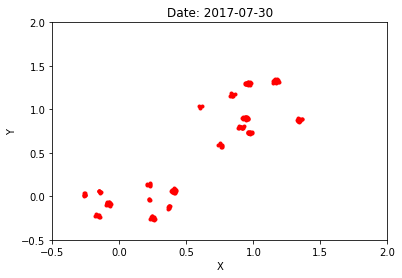

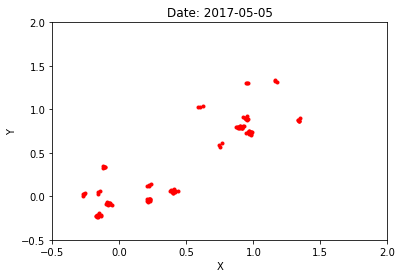

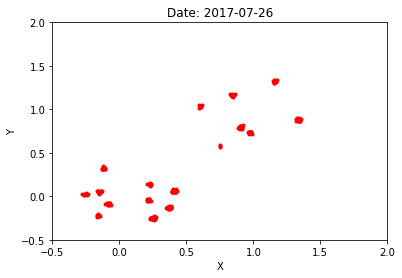

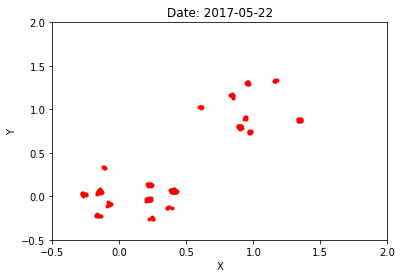

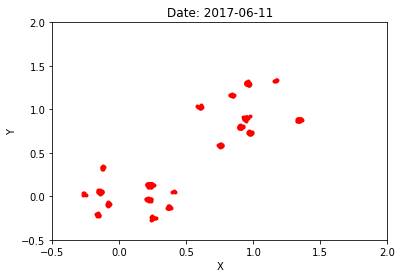

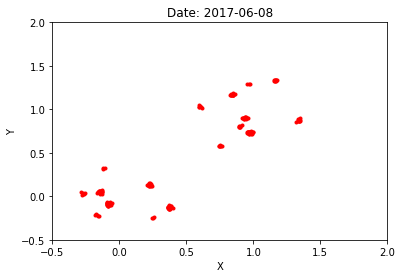

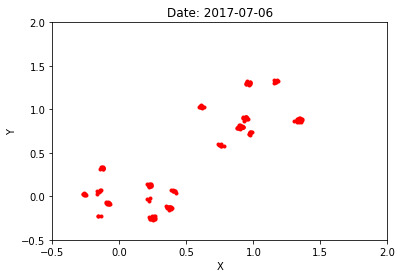

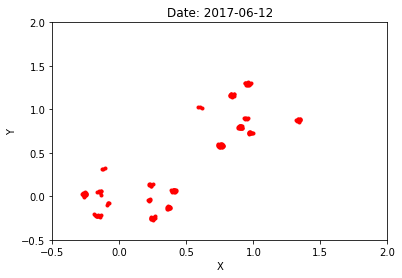

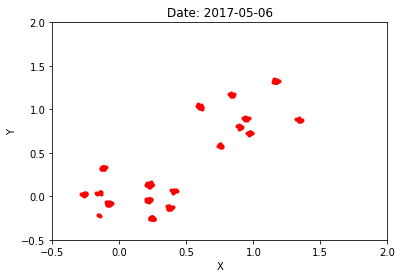

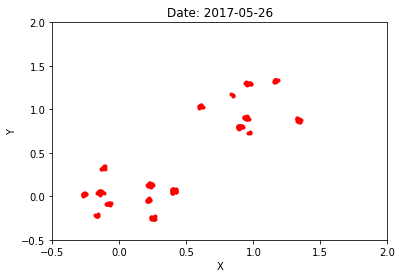

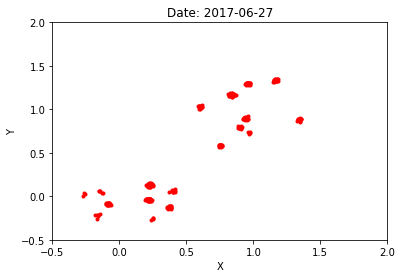

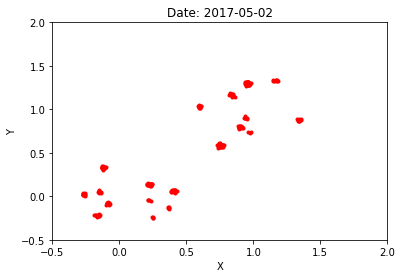

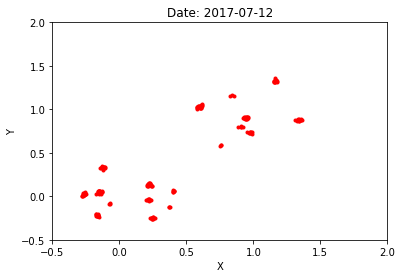

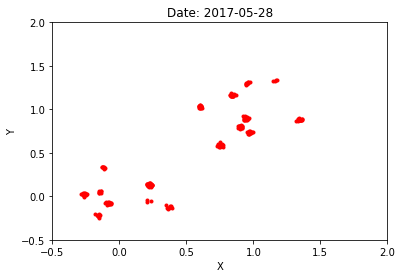

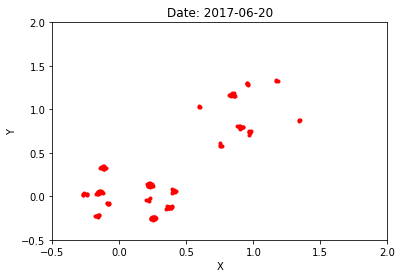

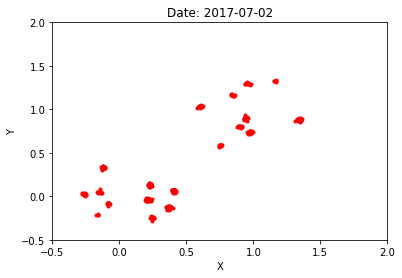

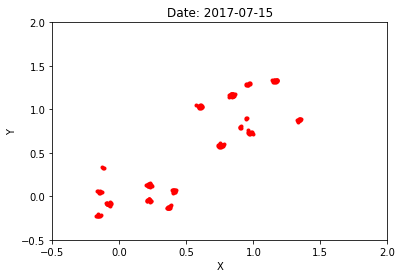

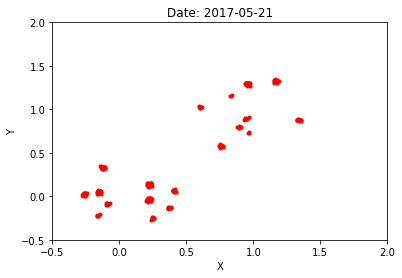

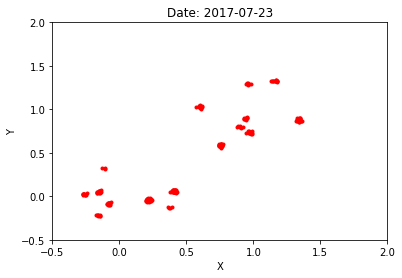

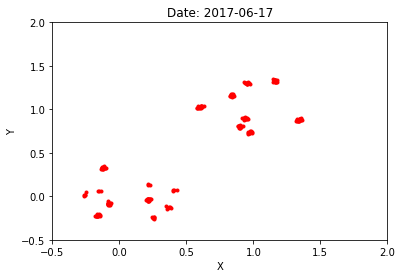

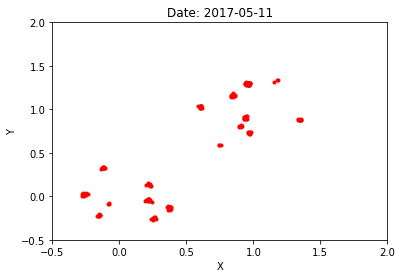

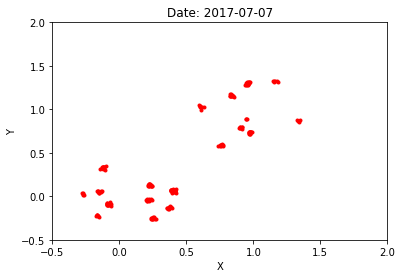

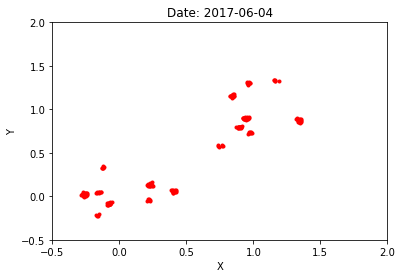

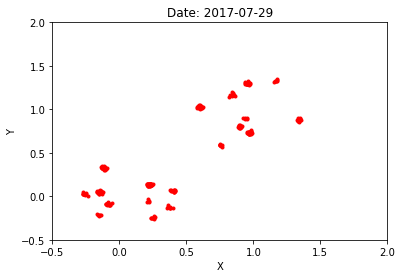

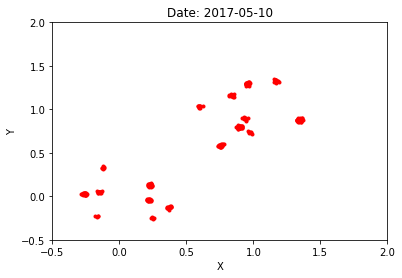

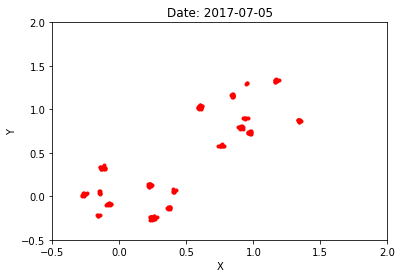

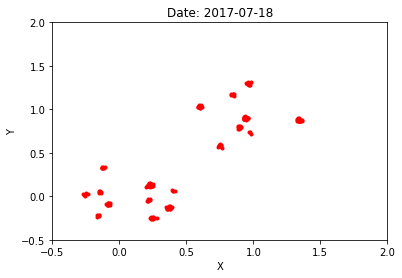

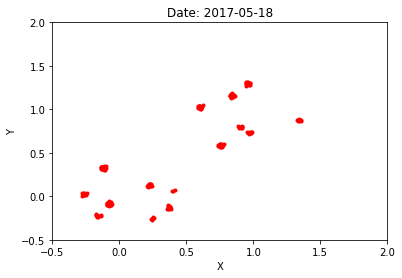

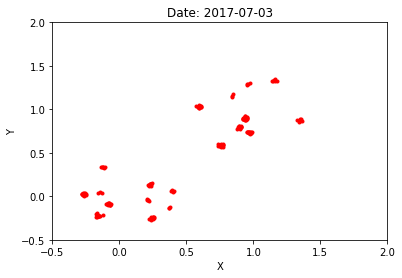

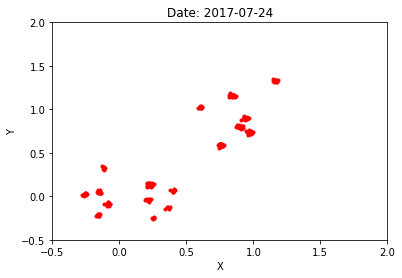

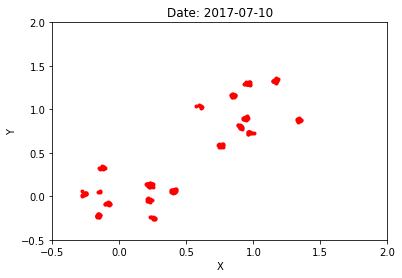

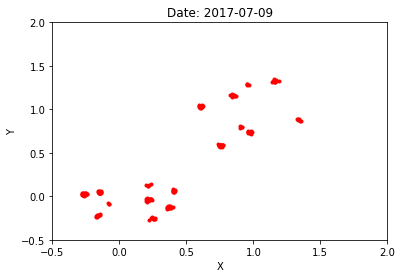

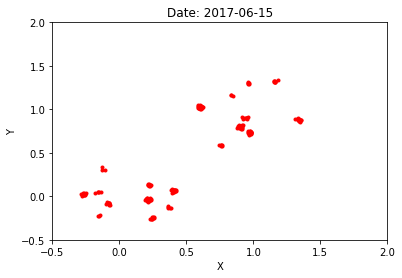

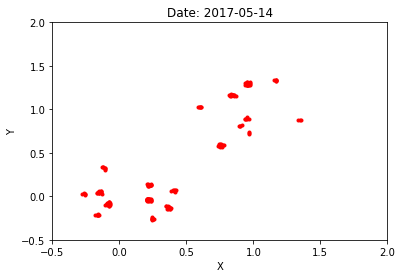

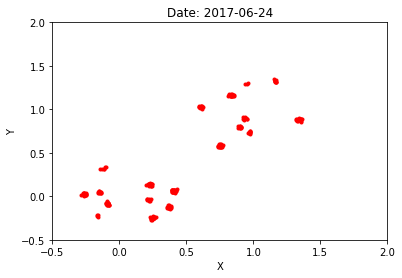

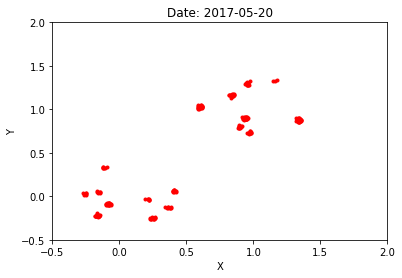

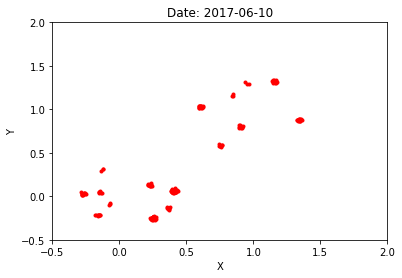

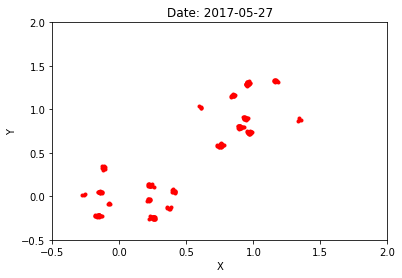

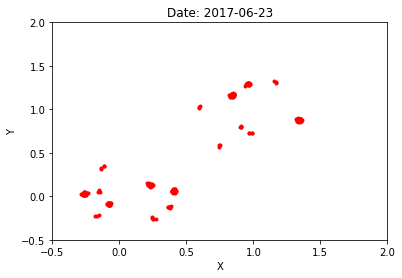

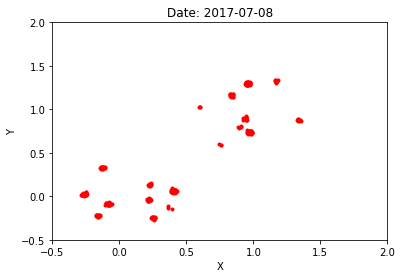

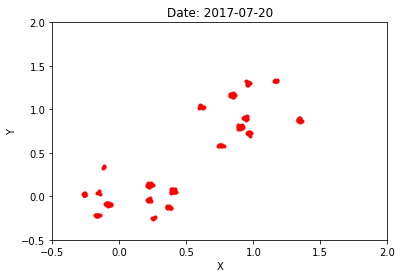

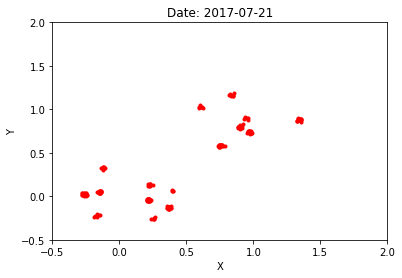

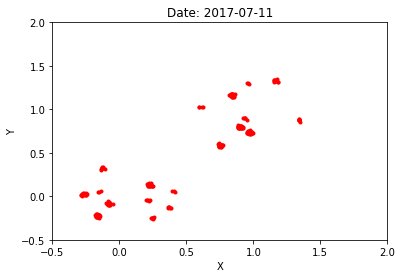

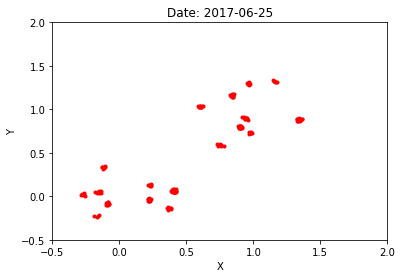

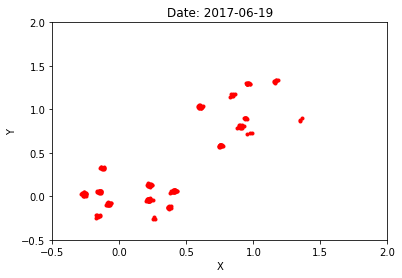

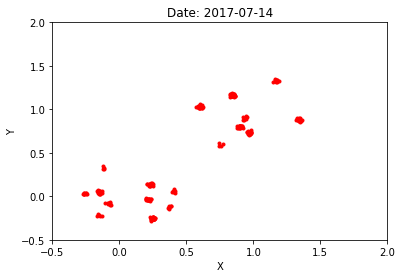

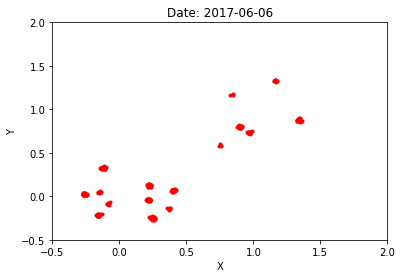

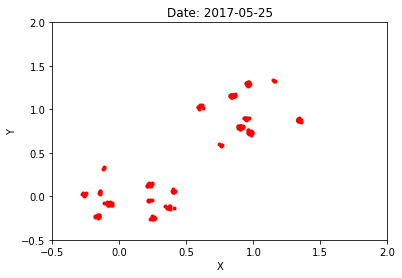

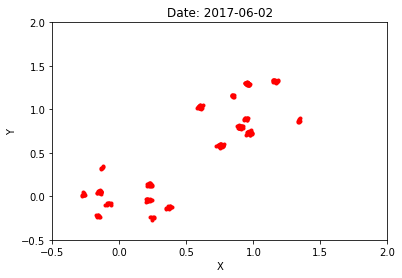

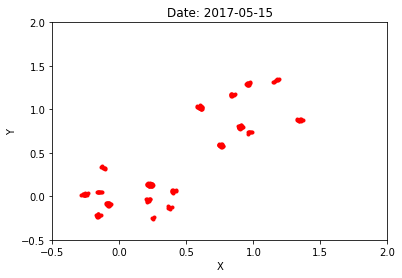

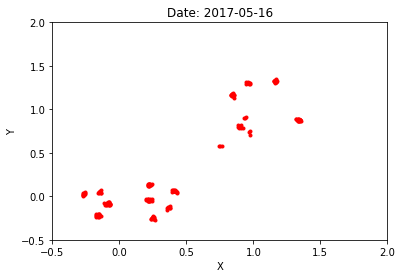

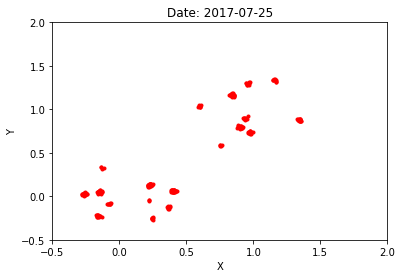

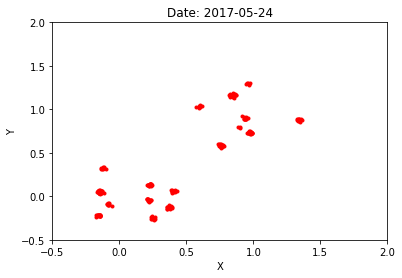

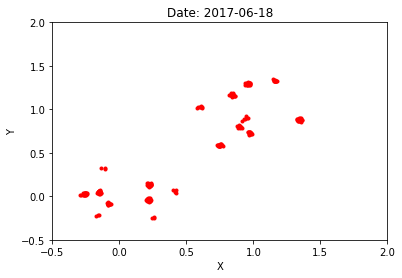

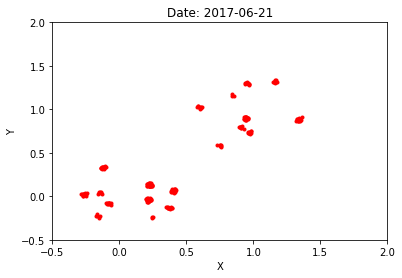

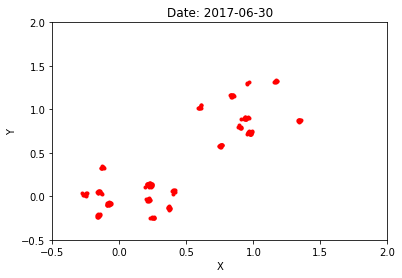

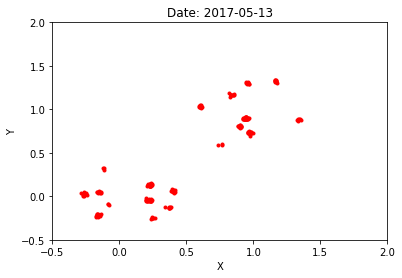

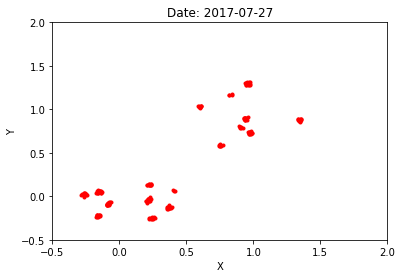

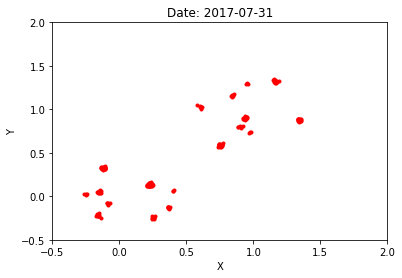

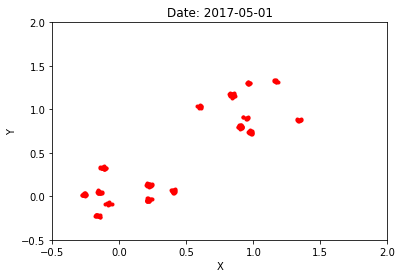

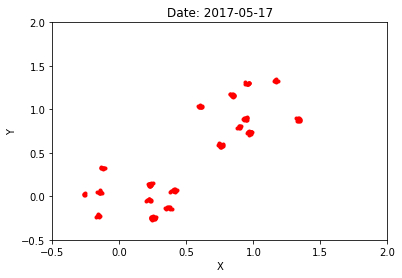

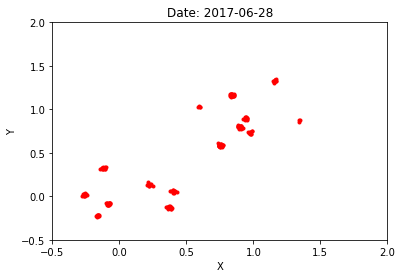

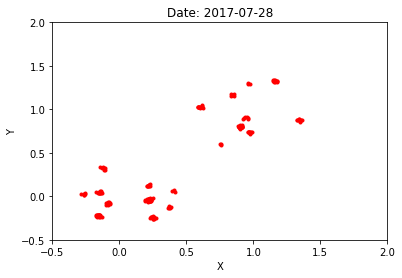

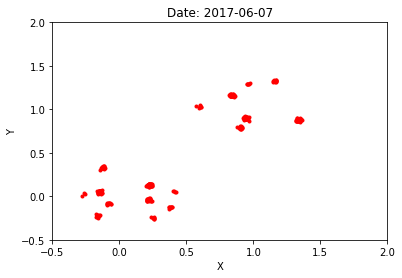

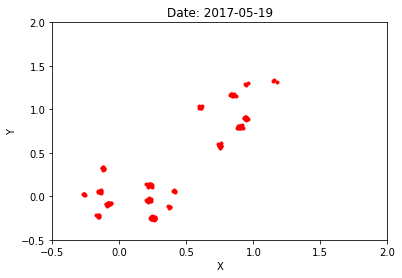

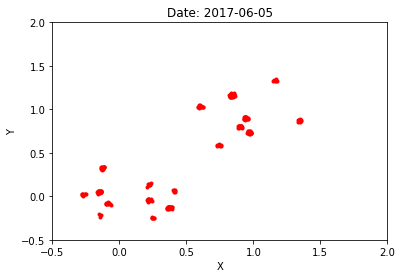

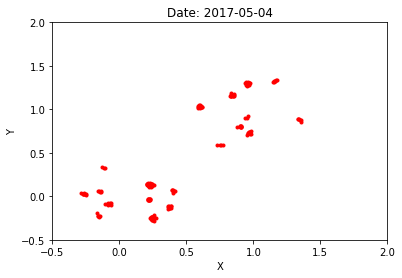

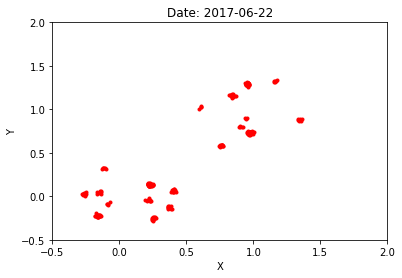

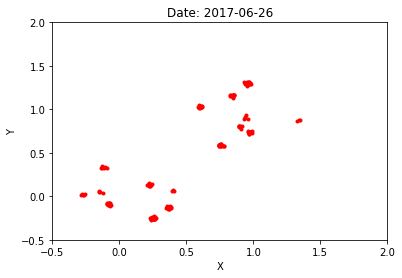

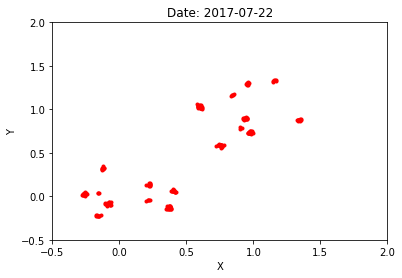

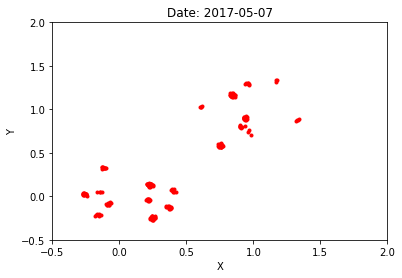

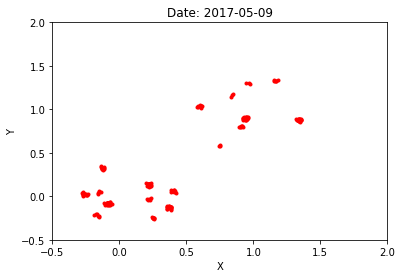

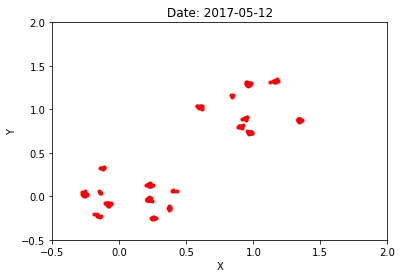

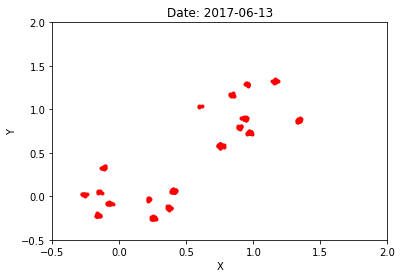

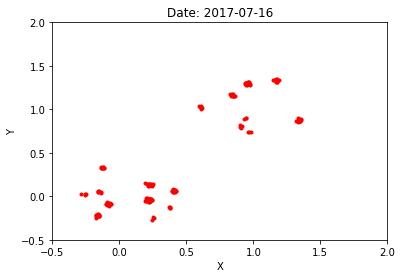

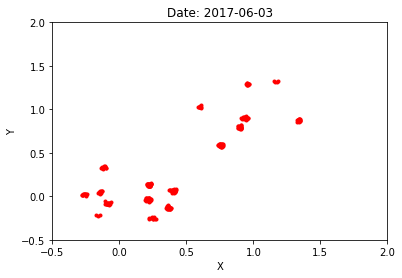

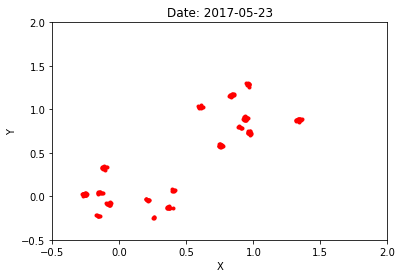

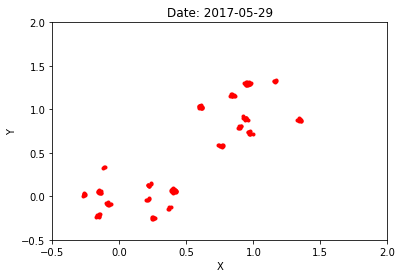

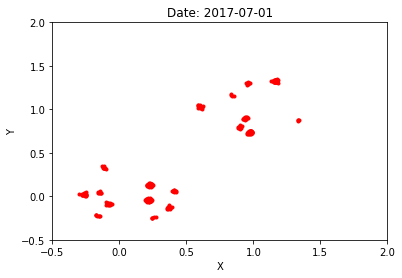

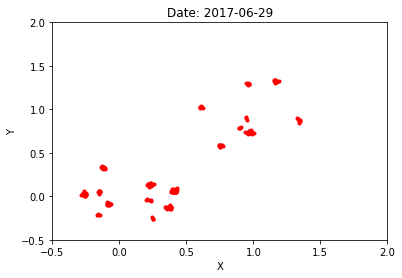

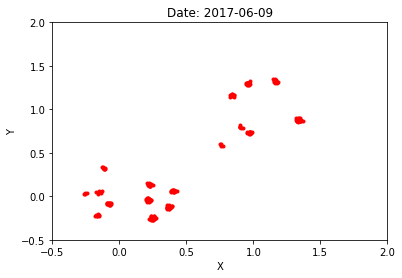

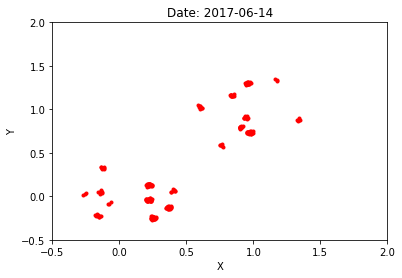

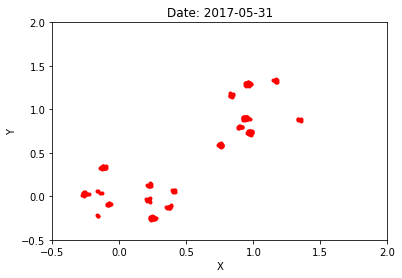

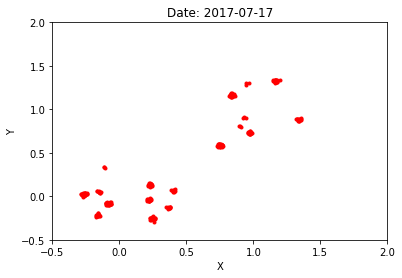

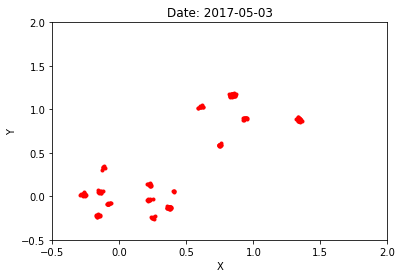

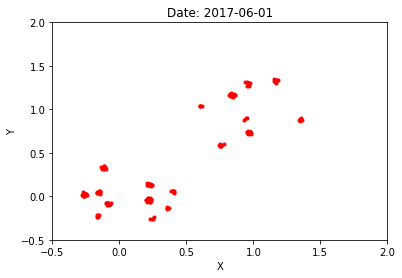

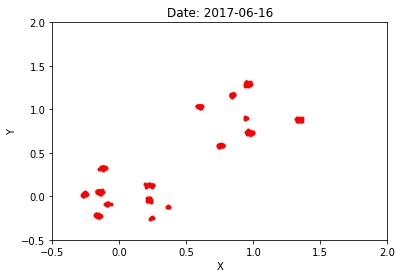

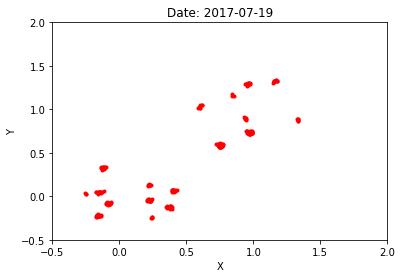

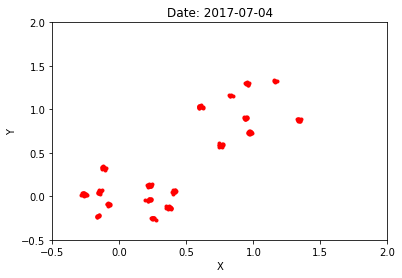

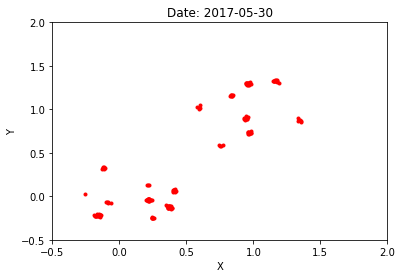

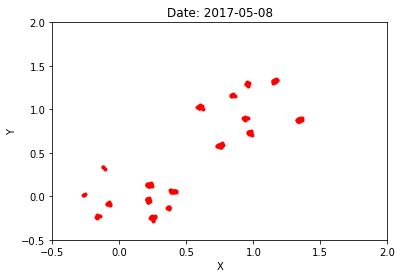

In [9]:
def displayDate(date):
    index = getIndex(date, uniquedays)
    Xi = uniquedays[index][1]
    Yi = uniquedays[index][2]
    plt.plot(Xi, Yi, "r.")
    axes = plt.gca()
    axes.set_xlim([-0.5, 2])
    axes.set_ylim([-0.5, 2])
    plt.ylabel("Y")
    plt.xlabel("X")
    titlestring = "Date: " + date
    plt.title(titlestring)
    plt.show()
    
for i in range(0, len(uniquedays)):
    displayDate(uniquedays[i][0])

By using this data we can observe what locations are more popular on different days.

The following converts the data into a more useful form.

In [10]:
#Grab the hours. Index by hour.
hours = []
for i in range(0, 24):
    hours.append([[],[]])

for i in range(0, len(timestamp)):
    for j in range(0, len(timestamp[i])):
        if timestamp[i][j] == " ":
            breaker = j
            break
    if timestamp[i][breaker + 2] == ':':
        ender = breaker + 2
    else:
        ender = breaker + 3
    #k grabs the hour
    k = int(timestamp[i][breaker+1:ender])
    #AM or PM
    aorp = timestamp[i][len(timestamp[i-2]):len(timestamp[i])]
    #Convert to military time, unless it's already in military time
    if aorp == "AM":
        if k == 12:
            k = 0
    elif aorp == "PM":
        if k == 12:
            k = 12
        else:
            k += 12
    hours[k][0].append(X[i])
    hours[k][1].append(Y[i])

It's now easy enough to graph the location data at a time of day. We go ahead and graph the whole day.

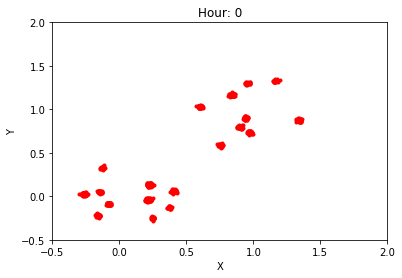

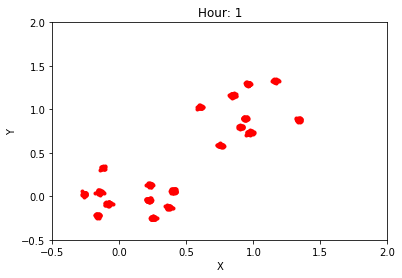

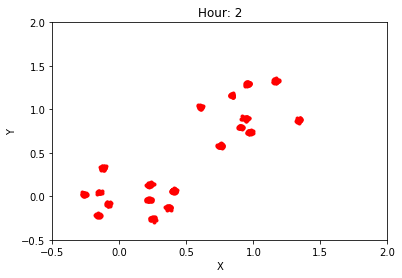

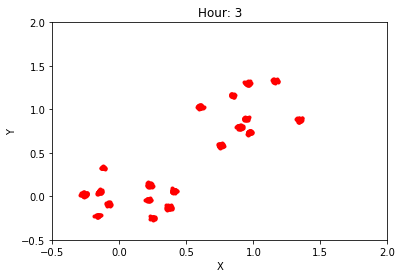

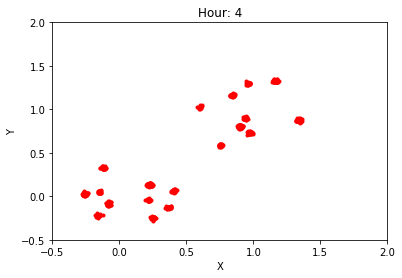

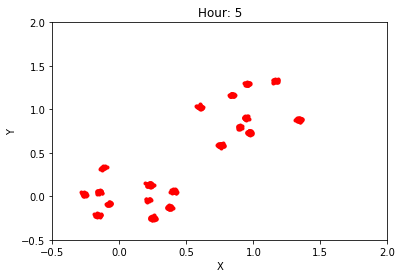

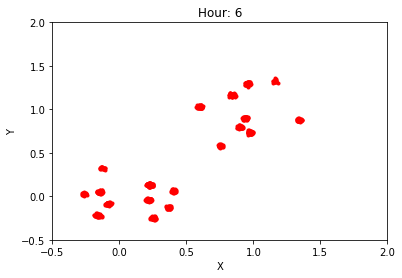

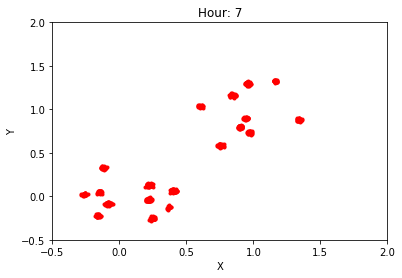

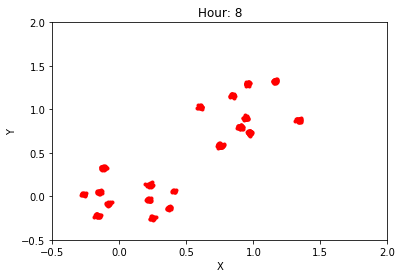

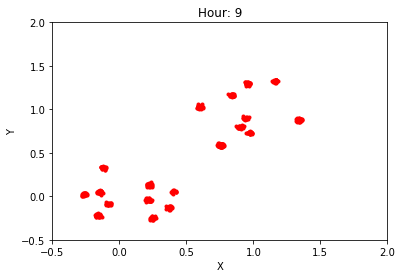

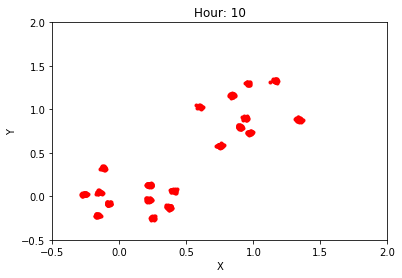

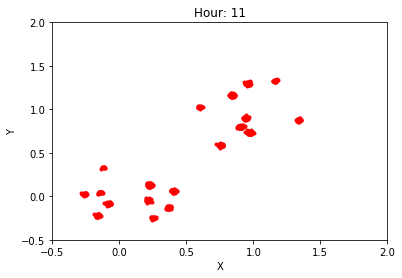

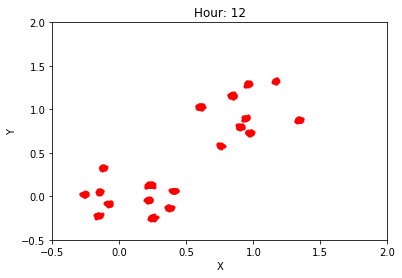

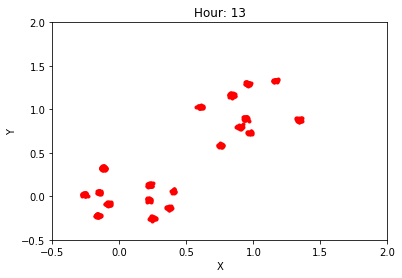

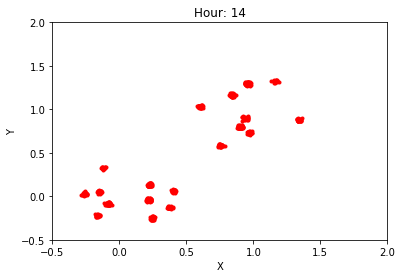

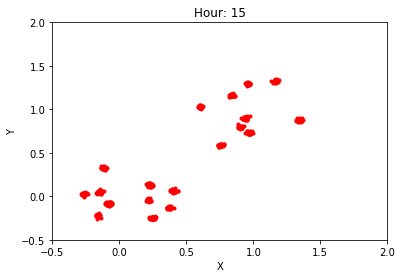

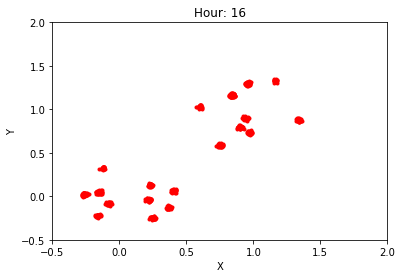

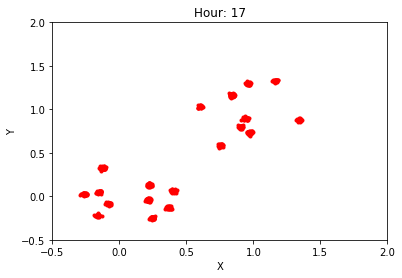

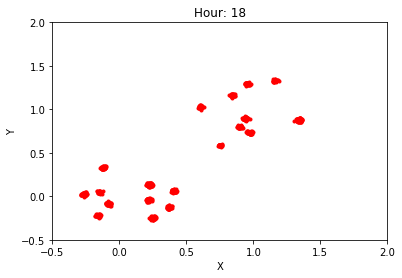

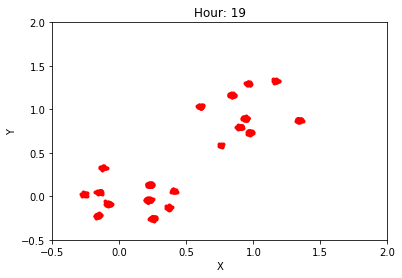

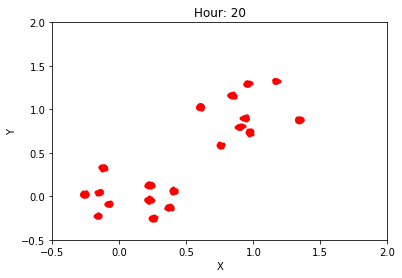

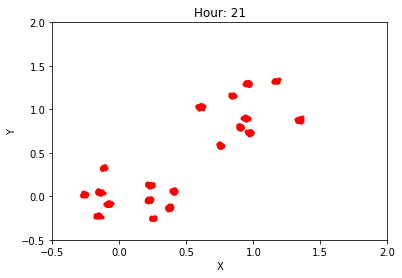

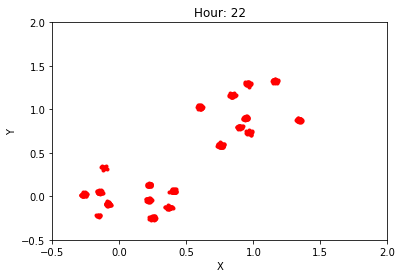

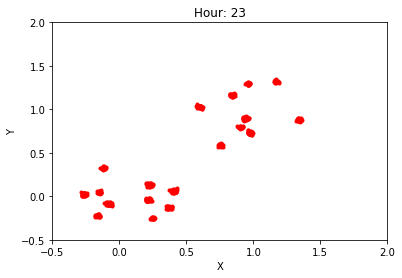

In [11]:
def displayHour(hour):
    Xi = hours[hour][0]
    Yi = hours[hour][1]
    plt.plot(Xi, Yi, "r.")
    axes = plt.gca()
    axes.set_xlim([-0.5, 2])
    axes.set_ylim([-0.5, 2])
    plt.ylabel("Y")
    plt.xlabel("X")
    titlestring = "Hour: " + str(hour)
    plt.title(titlestring)
    plt.show()
    
for i in range(0, 24):
    displayHour(i)

The position data appears to not vary much depending on time of day, so this is less useful.